# NBA Data: Exploratory Data Analysis

## Imports

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Load Data

In the *data wrangling* section, I created variables for which team had the better stat. So for *blocks* there was a binary *blocks_win* for whether or not the particular team tiedor had the most blocks. I experimented using those variables and they were not helpful so I reverted back to the originals.

In [13]:
nba_df = pickle.load(open("data_clean/nba_df.pkl", "rb"))
nba_df = nba_df[['game_id', 'fga', 'fg_pct', 'fg2a', 'fg2_pct', 'fg3a', 'fg3_pct', 'fta', 'ft_pct', 
                'reb', 'ast', 'stl', 'blk', 'to', 'pf', 'ast_to_ratio', 'fg3_fg2_ratio', 'win']]
nba_df.head()

,game_id,fga,fg_pct,fg2a,fg2_pct,fg3a,fg3_pct,fta,ft_pct,reb,ast,stl,blk,to,pf,ast_to_ratio,fg3_fg2_ratio,win
0,10300001,76.0,0.447368,68.0,0.470588,8.0,0.250000,30.0,0.500000,38.0,20.0,9.0,4.0,18.0,34.0,1.111111,0.117647,loss
1,10300001,70.0,0.457143,63.0,0.492063,7.0,0.142857,34.0,0.735294,41.0,23.0,8.0,4.0,18.0,26.0,1.277778,0.111111,win
2,10300002,81.0,0.493827,66.0,0.545455,15.0,0.266667,34.0,0.617647,48.0,25.0,18.0,7.0,25.0,35.0,1.000000,0.227273,win
3,10300002,75.0,0.426667,62.0,0.483871,13.0,0.153846,40.0,0.700000,43.0,20.0,9.0,4.0,24.0,26.0,0.833333,0.209677,loss
4,10300003,77.0,0.493506,71.0,0.478873,6.0,0.666667,29.0,0.689655,52.0,25.0,10.0,7.0,25.0,33.0,1.000000,0.084507,win


In [14]:
nba_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51337 entries, 0 to 51336
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        51337 non-null  object 
 1   fga            51337 non-null  float64
 2   fg_pct         51336 non-null  float64
 3   fg2a           51337 non-null  float64
 4   fg2_pct        51336 non-null  float64
 5   fg3a           51337 non-null  float64
 6   fg3_pct        51336 non-null  float64
 7   fta            51337 non-null  float64
 8   ft_pct         51336 non-null  float64
 9   reb            51337 non-null  float64
 10  ast            51337 non-null  float64
 11  stl            51337 non-null  float64
 12  blk            51337 non-null  float64
 13  to             51337 non-null  float64
 14  pf             51337 non-null  float64
 15  ast_to_ratio   51336 non-null  float64
 16  fg3_fg2_ratio  51336 non-null  float64
 17  win            51337 non-null  object 
dtypes: flo

## Metadata
Definitions for each variables to provide context

* **game_id:** Unique ID for each game
* **fga:** Total number of all field goals attempted
* **fg_pct:** Percent of all field goals scored
* **fg2a:** Total number of 2-point field goals attempted 
* **fg2_pct:** Percent of 2-point field goals scored
* **fg3a:** Total number of 3-point field goals attempted
* **fg3_pct:** Percent of 3-point field goals scored
* **fta:** Total number of free throws field goals attempted
* **ft_pct:** Percent of free throws field goals scored
* **reb:** Total number of rebounds (offensive + defensive)
* **ast:** Total number of assists
* **stl:** Total number of steals
* **blk:** Total number of blocks
* **to:** Total number of turnovers
* **pf:** Total number of personal fouls
* **ast_to_ratio:** assist to turnover ratio
* **fg3_fg2_ratio:** 3-point attempts to 2-point attempts ratio
* **win:** Dependent variable. Did the team win

## Additional Cleaning

Some games had tie scores after scores were aggregated. I think some of the player data is missing. Fortunately its only a few and there are over 25k games in the dataset. 

In [15]:
error_games = nba_df.assign(win = lambda x: np.where(x.win == "win", 1, 0)).\
    groupby("game_id").\
    agg(ish = ("win", "sum")).\
    query("ish > 1").reset_index().game_id

nba_df = nba_df.query("game_id not in @error_games")

There was one line with NA values so I'm going have that removed as well

In [16]:
na_games = nba_df[nba_df.isna().any(axis = 1)].game_id

nba_df = nba_df.query("game_id not in @na_games")

## Data Exploration

In [17]:
nba_df.describe().transpose().drop("count", axis = 1)

,mean,std,min,25%,50%,75%,max
fga,83.062247,8.147667,29.000000,78.000000,83.000000,88.000000,152.000000
fg_pct,0.454822,0.056301,0.243590,0.416667,0.453488,0.493506,0.686747
fg2a,60.414920,9.074593,21.000000,54.000000,60.000000,66.000000,113.000000
fg2_pct,0.493616,0.070587,0.225806,0.444444,0.491803,0.539683,0.800000
fg3a,22.647327,9.195398,1.000000,16.000000,21.000000,29.000000,73.000000
fg3_pct,0.352864,0.111146,0.000000,0.281250,0.352941,0.423077,1.000000
fta,24.087262,7.804055,1.000000,19.000000,24.000000,29.000000,64.000000
ft_pct,0.759021,0.101816,0.142857,0.695652,0.764706,0.829268,1.000000
reb,42.731102,6.641173,15.000000,38.000000,42.000000,47.000000,83.000000
ast,22.079898,5.222513,4.000000,18.000000,22.000000,25.000000,52.000000


In [18]:
# This is just a for loop version of creating every boxplot
#for i in nba_df.columns.drop(['game_id', 'win']):
#    df = pd.melt(nba_df[['win', i]], id_vars = "win", value_vars = [i])
#    plt.figure()
#    p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
#    p.set_title(i, fontsize = 20)
#    p.set_xlabel("")
#    p.set_ylabel("")

#### Field Goal Attempts
Field goal attempts have about the same distribution between winning teams and losing teams

Text(0, 0.5, '')

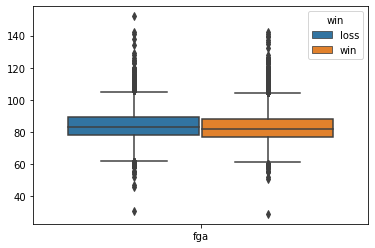

In [19]:
df = pd.melt(nba_df[["win", "fga"]], id_vars = "win", value_vars = ["fga"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Field Goal Percent
Winning teams have noticably higher Field Goal Percentage. The distribution between Winning and Losing teams is about the same

Text(0, 0.5, '')

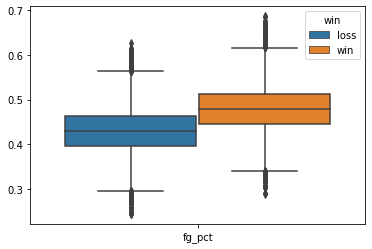

In [20]:
df = pd.melt(nba_df[["win", "fg_pct"]], id_vars = "win", value_vars = ["fg_pct"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### 2-Point Field Goal Attempts
Winning teams and losing teams have about the same 2-point field goal attempts, though losing teams are slightly higher. The difference is small enough that it could just be my sample or coincidence. 

Text(0, 0.5, '')

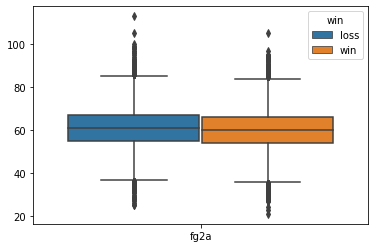

In [21]:
df = pd.melt(nba_df[["win", "fg2a"]], id_vars = "win", value_vars = ["fg2a"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### 2-Point Field Goal Percent
Winning teams have noticable higher 2-Point Field Goal Percentage. Interesting because they also had slightly fewer attempts. So overall, winning team are more efficient from 2.

Text(0, 0.5, '')

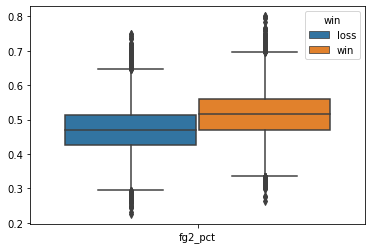

In [22]:
df = pd.melt(nba_df[["win", "fg2_pct"]], id_vars = "win", value_vars = ["fg2_pct"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### 3-Point Field Goal Attempts
Winning and losing teams have about the same number of 3-Point Filed Goal Attempts

Text(0, 0.5, '')

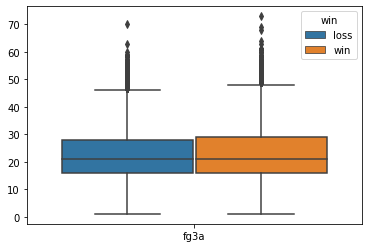

In [23]:
df = pd.melt(nba_df[["win", "fg3a"]], id_vars = "win", value_vars = ["fg3a"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### 3-Point Field Goal Percent
Winning teams have a noticably higher 3-Point Field Goal Percentage. Again, it's about taking quality shots and not just jacking up 3-Pointers like some people think the sport has devolved into

Text(0, 0.5, '')

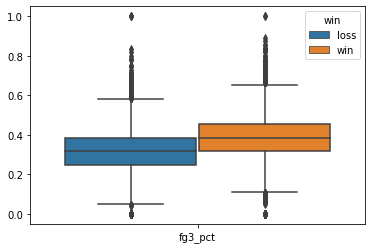

In [24]:
df = pd.melt(nba_df[["win", "fg3_pct"]], id_vars = "win", value_vars = ["fg3_pct"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Free Throw Attempts
Winning teams have slightly more Free Throw Attempts.

Text(0, 0.5, '')

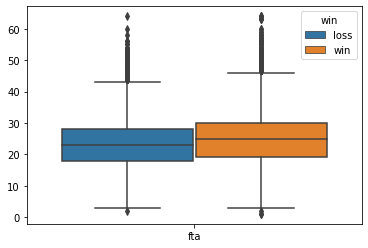

In [25]:
df = pd.melt(nba_df[["win", "fta"]], id_vars = "win", value_vars = ["fta"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Free Throw Percent
Winning teams shoot slightly better from the foul line than losing teams. There have been both winning and losing teams that shot 100% from the foul line.

Text(0, 0.5, '')

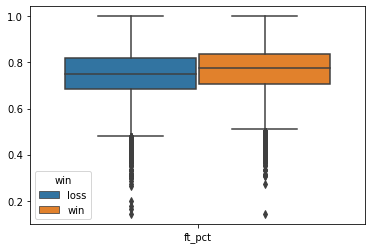

In [26]:
df = pd.melt(nba_df[["win", "ft_pct"]], id_vars = "win", value_vars = ["ft_pct"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Rebounds
Winning teams have noticably more Rebounds than losing teams. This is very consistent from what I've seen watching. You'll often hear commentators mention "winning the rebounding battle".

Text(0, 0.5, '')

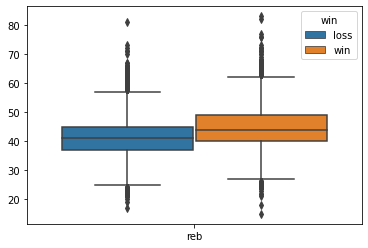

In [27]:
df = pd.melt(nba_df[["win", "reb"]], id_vars = "win", value_vars = ["reb"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Assists
Winning teams have noticably more Assists than losing teams. Thanks San Antonio

Text(0, 0.5, '')

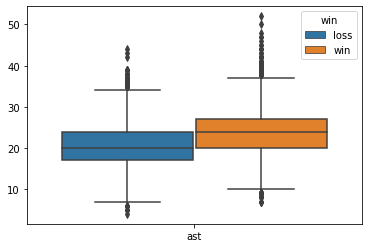

In [28]:
df = pd.melt(nba_df[["win", "ast"]], id_vars = "win", value_vars = ["ast"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Steals
Winning teams have slightly more Steals than losing teams. However, steals are so far and few between that it isn't a big difference.

Text(0, 0.5, '')

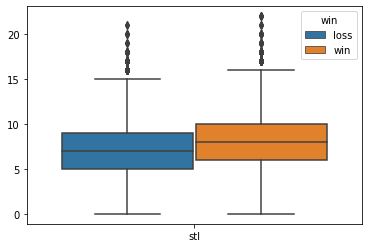

In [29]:
df = pd.melt(nba_df[["win", "stl"]], id_vars = "win", value_vars = ["stl"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Blocks
Winning teams have slightly more Blocks than losing teams. There have been both winning and losing teams with 0 blocks.

Text(0, 0.5, '')

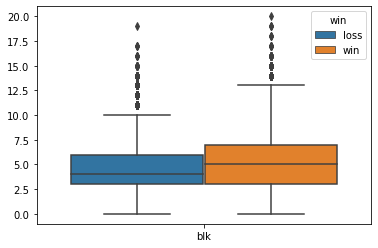

In [30]:
df = pd.melt(nba_df[["win", "blk"]], id_vars = "win", value_vars = ["blk"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Turnovers
Winning teams have slightly fewer Turnovers than losing teams. Considering how crucial turnovers are, I'm surprised it the difference isn't larger.

Text(0, 0.5, '')

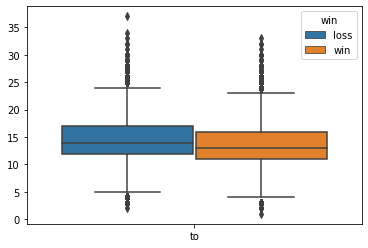

In [31]:
df = pd.melt(nba_df[["win", "to"]], id_vars = "win", value_vars = ["to"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Personal Fouls
Winning teams have slightly fewer Personal Fouls than losing teams.

Text(0, 0.5, '')

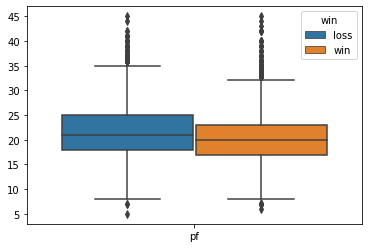

In [32]:
df = pd.melt(nba_df[["win", "pf"]], id_vars = "win", value_vars = ["pf"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Assist-to-Turnover Ratio
Winning teams have noricably higher Assist-to-Turnover ratios. It's a little difficult to see with the way the distrubtions fit on the plot though.

Text(0, 0.5, '')

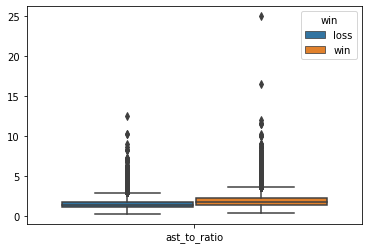

In [33]:
df = pd.melt(nba_df[["win", "ast_to_ratio"]], id_vars = "win", value_vars = ["ast_to_ratio"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### 3-Point Field Goal to 2-Point Field Goal Ratio
Winning and losing teams have about the same 3-point to 2-point field goal attempt ratio. So the winning team isn't necessarily the team that forgoes 2-pointers for 3-points. Sorry Houston Rockets of a few seasons ago.

Text(0, 0.5, '')

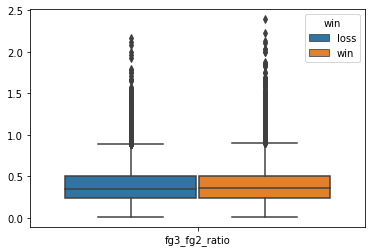

In [34]:
df = pd.melt(nba_df[["win", "fg3_fg2_ratio"]], id_vars = "win", value_vars = ["fg3_fg2_ratio"])
plt.figure()
p = sns.boxplot(data = df, x = "variable", y = "value", hue = "win")
p.set_title(None)
p.set_xlabel(None)
p.set_ylabel(None)

#### Correlations
2-Point to 3-Point Field Goal ratio is so highly correlated with 3-Point attempts (.95) and 2-Point attempts (-.76) that I'm going to remove it. It makes sense because you only have so many shot attempts. In comparison, Assist-to-Turnover ratio is less correlated with Assists (.56) and Turnovers (.73). This makes sense as the less you pass the ball, the les of a chance you have for both assists and turnovers. I'll actaully remove both for simplicity

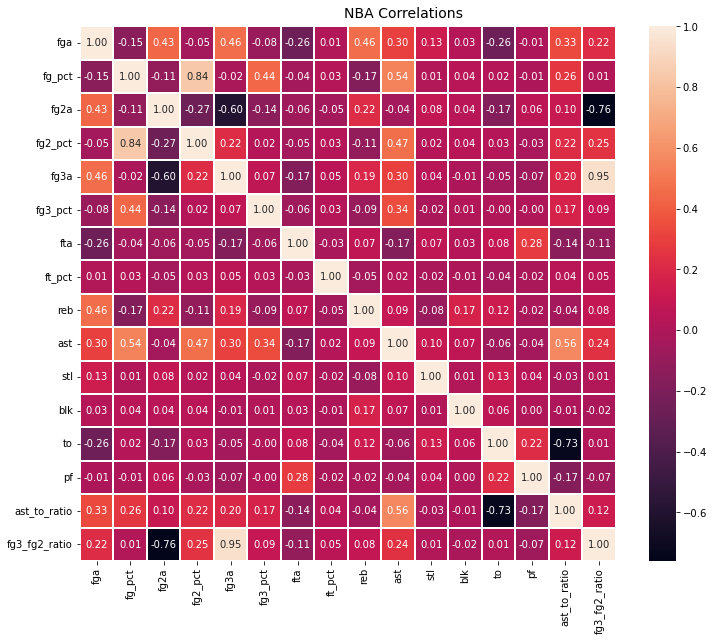

In [35]:
corrmat = nba_df.corr()
f, ax = plt.subplots(figsize = (12, 9))
hm = sns.heatmap(round(corrmat, 2), annot = True, ax = ax, fmt = ".2f", linewidths = .05)
f.subplots_adjust(top = .95)
t = f.suptitle("NBA Correlations", fontsize = 14)

In [36]:
nba_df = nba_df.drop(columns = ["ast_to_ratio", "fg3_fg2_ratio"])

## Save Data

In [37]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

save_object(nba_df, 'data_clean/nba_df2.pkl')